In [1]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima.arima import auto_arima

In [6]:
def Arima(train, test):
    files = ['fpt', 'cmg', 'elc']
    for file in files:
        df = pd.read_csv(f'../../IS403_O21_14/Dataset/{file}_data_final.csv', index_col='Date')
        df.index = pd.to_datetime(df.index)
        train_size = int(train * len(df))
        test_size = int(test * len(df))
        train_data = df[:train_size]
        test_data = df[train_size:train_size+test_size]
        # 3. Quá trình Training
        x_train = np.array(train_data.index).reshape(-1, 1)
        y_train = np.array(train_data['Price'])

        # Fit ARIMA model using auto_arima
        # This function automatically selects the best parameters
        # m = 3, seasonal = True is setting for sarimax using
        model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

        # Print the summary of the best model
        print(model.summary())

        # Fit the model
        model.fit(y_train)

        # 4. Quá trình testing
        x_test = np.array(test_data.index).reshape(-1, 1)
        y_test = np.array(test_data['Price'])
        y_pred = model.predict(n_periods=len(y_test))

        # 7. Đánh giá độ chính xác test
        test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
        print(f' RMSE {file.upper()}:', test_rmse)
        # Calculate Mean Absolute Error (MAE)
        test_mae = np.mean(np.abs(y_pred - y_test))
        print(f' MAE {file.upper()}:', test_mae)
        # Calculate Mean Absolute Percentage Error (MAPE)
        test_mape = np.mean(np.abs((y_pred - y_test) / y_test)) * 100
        print(f' MAPE {file.upper()}:', test_mape)

        # 8. Dự đoán 30 ngày tiếp theo
        # Create an array of 30 consecutive integers starting from last_index
        x_next_30_days = np.array(range(test_size, test_size + 30)).reshape(-1, 1)
        x_next_90_days = np.array(range(test_size, test_size + 90)).reshape(-1, 1)

        # Predict the closing prices for the next 30 days
        y_next_30_days = model.predict(n_periods=len(x_next_30_days))
        y_next_90_days = model.predict(n_periods=len(x_next_90_days))

        train_index = pd.RangeIndex(start=0, stop=train_size, step=1)
        test_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
        next30_index = pd.RangeIndex(start=len(df), stop=len(df) + 30, step=1)
        next60_index = pd.RangeIndex(start=len(df) + 30, stop=len(df) + 60, step=1)
        next90_index = pd.RangeIndex(start=len(df) + 60, stop=len(df) + 90, step=1)
        
        # 9.Vẽ hình
        plt.plot(train_index, train_data['Price'])
        plt.plot(test_index, test_data['Price'])
        plt.plot(test_index, y_pred)
        plt.plot(next30_index,y_next_90_days[:30])
        plt.plot(next60_index,y_next_90_days[30:60])
        plt.plot(next90_index,y_next_90_days[60:])
        plt.legend(['Train', 'Test', 'Predictions','Predict30days', 'Predict60days', 'Predict90days'])    
        plt.title(f'{file.upper()}')
        plt.show()



Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=34156.409, Time=0.45 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=34343.383, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=34266.497, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=34222.070, Time=0.42 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=34343.583, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=34166.282, Time=0.43 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=34162.998, Time=0.26 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=34123.557, Time=1.79 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=34164.945, Time=0.55 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=34111.494, Time=3.31 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=34158.059, Time=0.80 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=34121.688, Time=1.06 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=34103.574, Time=3.58 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=34105.769, Time=2.62 sec
 ARIMA(5,1,3)(0,0,0

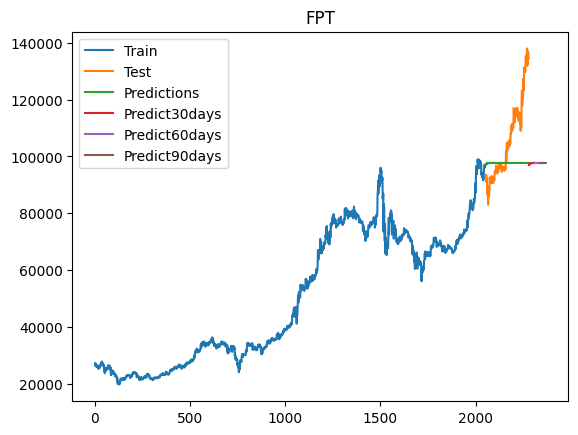

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=33095.225, Time=0.50 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=33314.548, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=33270.067, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=33228.093, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=33312.876, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=33124.506, Time=0.27 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=33096.430, Time=0.24 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=33081.212, Time=2.05 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=33082.196, Time=1.03 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=33077.390, Time=2.14 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=33082.089, Time=1.21 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=33084.171, Time=0.80 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=33076.897, Time=2.49 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=33077.760, Time=1.39 sec
 ARIMA(5,1,3)(0,0,0

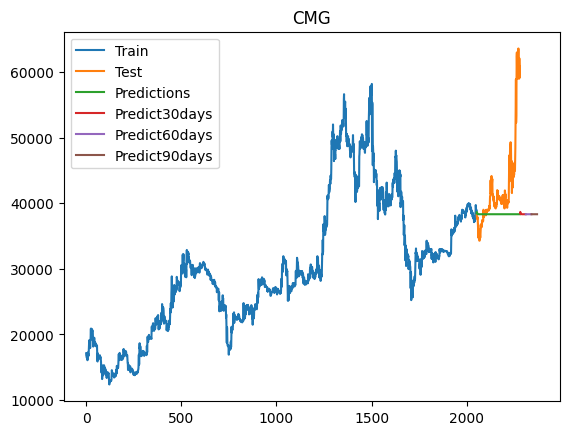

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=29905.417, Time=0.52 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=30217.564, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=30182.159, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=30137.027, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=30215.740, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=29938.556, Time=0.57 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=29910.654, Time=0.22 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=29860.516, Time=1.58 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=29858.474, Time=1.82 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=29904.330, Time=0.16 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=29860.277, Time=1.65 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=29932.880, Time=0.13 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=29900.271, Time=0.28 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=29836.859, Time=2.12 sec
 ARIMA(5,1,2)(0,0,0

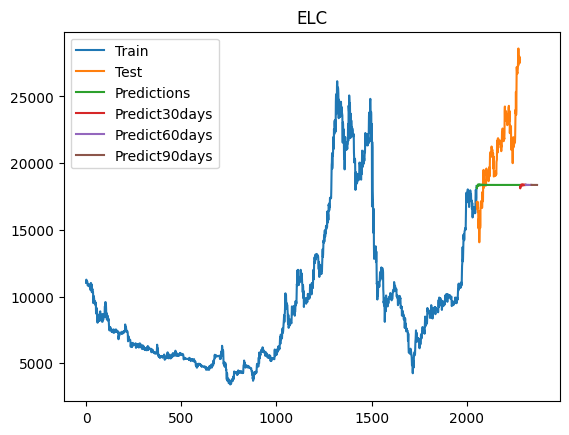

In [7]:
Arima(0.9, 0.1)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=30359.618, Time=0.41 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=30535.596, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=30457.230, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=30414.841, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=30534.456, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=30371.767, Time=0.32 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=30370.711, Time=0.25 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=30340.158, Time=1.56 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=30372.512, Time=0.37 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=30330.310, Time=3.01 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=30348.136, Time=1.45 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=30331.971, Time=1.36 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=30323.934, Time=2.07 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=30342.464, Time=0.73 sec
 ARIMA(5,1,3)(0,0,0

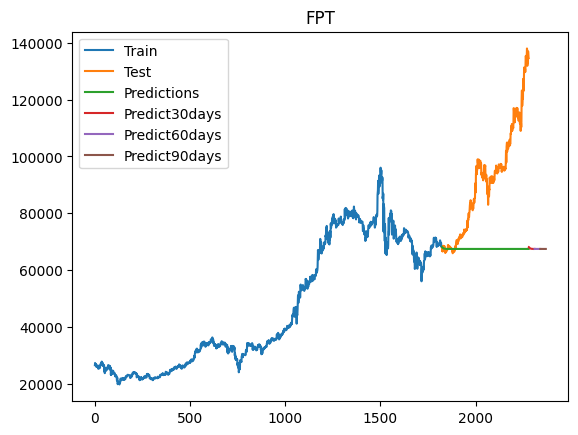

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=29575.489, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=29775.487, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=29735.950, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=29697.698, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=29773.652, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=29602.479, Time=0.23 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=29576.380, Time=0.25 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=29562.435, Time=1.23 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=29562.959, Time=0.85 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=29559.037, Time=2.15 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=29563.190, Time=1.19 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=29565.243, Time=1.10 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=29557.873, Time=2.55 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=29558.669, Time=1.14 sec
 ARIMA(5,1,3)(0,0,0

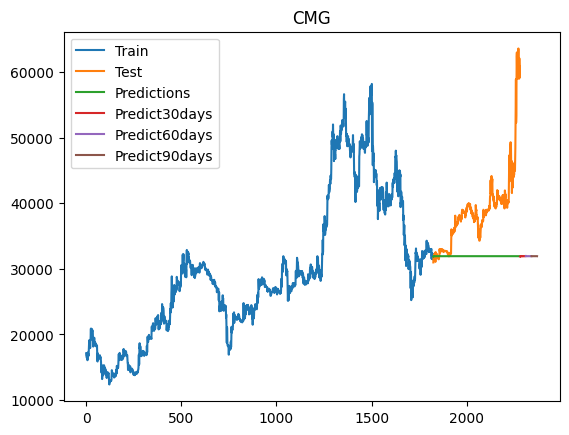

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=26636.866, Time=0.33 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=26936.259, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=26896.428, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=26847.402, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=26934.276, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=26674.122, Time=0.52 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=26643.788, Time=0.21 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=26598.525, Time=1.24 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=26596.324, Time=1.06 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=26637.580, Time=0.13 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=26598.698, Time=1.59 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=26663.416, Time=0.14 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=26633.064, Time=0.21 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=26577.406, Time=2.44 sec
 ARIMA(5,1,2)(0,0,0

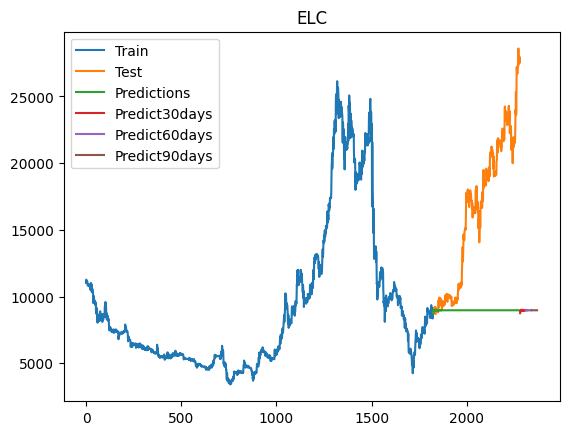

In [8]:
Arima(0.8, 0.2)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=26582.740, Time=0.42 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=26734.347, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=26662.319, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=26626.855, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=26733.392, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=26589.574, Time=0.59 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=26592.245, Time=0.18 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=26564.406, Time=1.37 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=26594.176, Time=0.31 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=26555.734, Time=1.61 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=26571.933, Time=1.76 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=26559.199, Time=0.76 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=26548.206, Time=1.73 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=26565.797, Time=0.88 sec
 ARIMA(5,1,3)(0,0,0

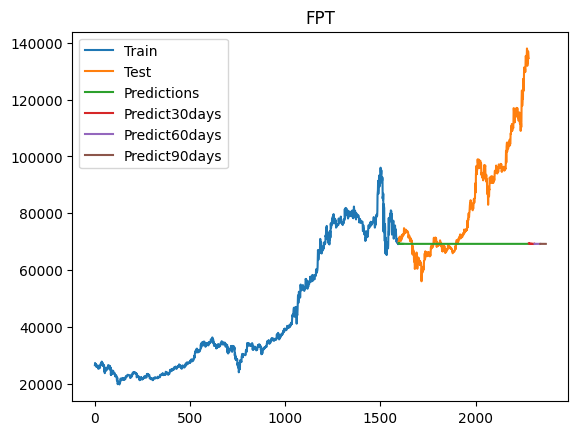

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=25771.834, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=25953.830, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=25925.570, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=25894.309, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=25952.356, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=25801.313, Time=0.17 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=25772.266, Time=0.18 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=25762.131, Time=1.00 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=25761.077, Time=0.84 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=25771.259, Time=0.14 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=25762.399, Time=1.19 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=25773.788, Time=0.12 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=25770.550, Time=0.23 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.01 sec
 ARIMA(3,1,1)(0,0,0)[0]  

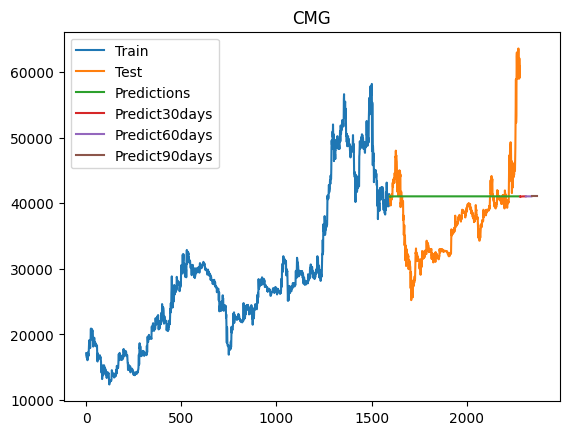

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=23412.349, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=23683.887, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=23644.005, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=23597.534, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=23681.892, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=23450.047, Time=0.45 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=23422.646, Time=0.19 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=23380.502, Time=1.00 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=23378.255, Time=1.06 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=23416.371, Time=0.12 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=23380.210, Time=1.43 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=23440.392, Time=0.12 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=23411.582, Time=0.19 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=23360.963, Time=1.65 sec
 ARIMA(5,1,2)(0,0,0

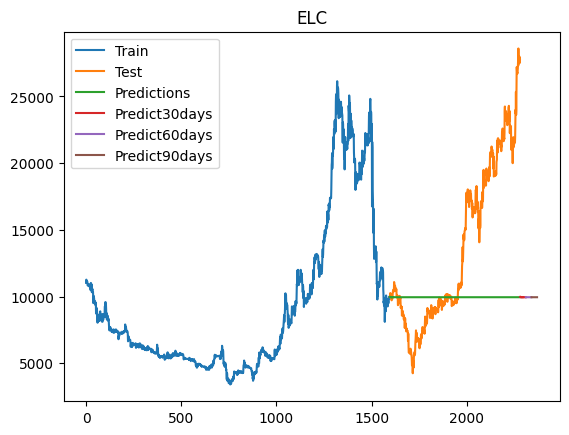

In [9]:
Arima(0.7, 0.3)